In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import norm

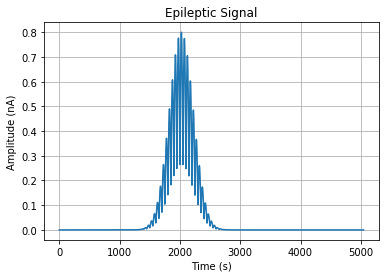

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 2.048  # in seconds, changed from milliseconds
sampling_rate = 1000  # samples per second, same as before
frequency = 10  # Hz
sigma = 0.2  # Standard deviation for Gaussian envelope, changed from milliseconds to seconds

# Time array
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)  # Using linspace to generate time array

# Gaussian envelope
gaussian = np.exp(-(t - duration/2)**2 / (2 * sigma**2))

# Sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Combine Gaussian and sine
signal = gaussian * sine_wave
signal = np.abs(signal)  # Take absolute value to ensure positive domain

# Create offset in signal
signal = signal+(gaussian/2)

# Add 0 in front and back

before_zeros = np.zeros(int(1000))
after_zeros = np.zeros(int(2000))

signal = np.concatenate((before_zeros, signal, after_zeros))

# Scaling
signal = signal / max(signal) * 0.8

# Plot
plt.plot(signal)
plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (nA)')
plt.grid(True)
# plt.show()
plt.savefig('signal-0.8.png', bbox_inches='tight', dpi=300)

with open(r'signal-0.8.txt', 'w') as f:
    f.write("\n".join(map(str, signal)))


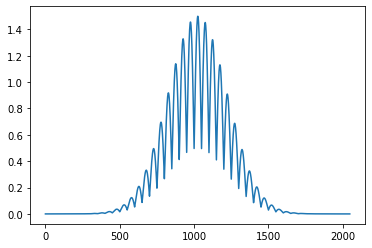

In [30]:
signal_offset = signal+(gaussian/2)

plt.plot(signal_offset)

In [31]:
with open(r'signal-offset.txt', 'w') as f:
    f.write("\n".join(map(str, signal_offset)))

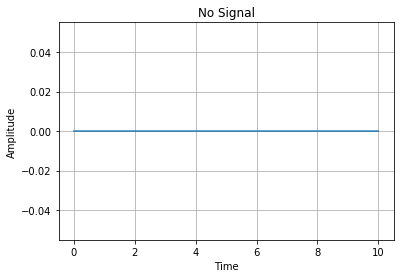

In [5]:
import numpy as np

# Define the number of time points
num_time_points = 5000

# Define the time values
time = np.linspace(0, 10, num_time_points)  # Assuming time interval is from 0 to 10 seconds

# Create the signal with constant amplitude 5
signal = np.full(num_time_points, 0)

# Optionally, you can visualize the signal
import matplotlib.pyplot as plt

plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('No Signal')
plt.grid(True)
plt.show()

with open(r'no-signal.txt', 'w') as f:
    f.write("\n".join(map(str, signal)))


In [9]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

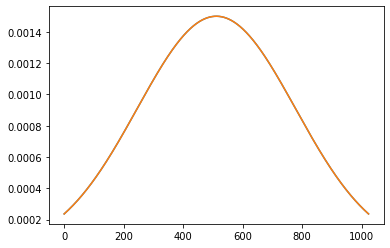

In [10]:
plt.plot(norm.pdf(t, mean, sd))
plt.plot(norm.pdf(t, mean, sd))

In [16]:
# Variables

total_signal_duration = 2048
total_flanking_noise_duration = 1024

num_samples = total_signal_duration - total_flanking_noise_duration

gauss2sine_scaling_factor = 16
gauss2noise_scaling_factor = 64
gauss2flanking_noise_scaling_factor = 64


# Signal Generation

t = np.linspace(0, num_samples-1, num_samples)

mean = np.mean(t)
sd = np.std(t)*0.9

height_gaussian = 1/(np.sqrt(2*np.pi) * sd)
gaussian = norm.pdf(t, mean, sd)
min_gaussian = min(gaussian)

sine_amplitude = height_gaussian/gauss2sine_scaling_factor

sine = sine_amplitude*(1 +np.sin(t/(2*np.pi)))

noise_amplitude = height_gaussian/gauss2noise_scaling_factor
noise = np.random.normal(0, noise_amplitude, num_samples)

signal = noise + sine + gaussian

# # Flanking Noise

# flanking_noise_amplitude = height_gaussian/gauss2flanking_noise_scaling_factor

# before_noise = abs(np.random.normal(min_gaussian, flanking_noise_amplitude, int(total_flanking_noise_duration/2)))
# signal = np.concatenate((before_noise, signal))

# after_noise = abs(np.random.normal(min_gaussian, flanking_noise_amplitude, int(total_flanking_noise_duration/2)))
# signal = np.concatenate((signal, after_noise))

# Pad with zeros
before_zeros = np.zeros(int(total_flanking_noise_duration / 2))
after_zeros = np.zeros(int(total_flanking_noise_duration / 2))

signal = np.concatenate((before_zeros, signal, after_zeros))

# Pad with zeros and apply a Hann window to smooth the transition
# from scipy.signal import hann
# zero_flank_length = int(total_flanking_noise_duration / 2)
# hann_window_start = hann(zero_flank_length * 2 + num_samples, sym=False)[:num_samples]
# hann_window_end = hann(zero_flank_length * 2 + num_samples, sym=False)[-num_samples:]

# signal *= hann_window_start
# signal *= hann_window_end[::-1]  # Reversed Hann window for the end



# Scaling Signal between 0-1 (MinMax Scaling)

signal_max = max(signal)
signal_min = min(signal)

scaled_signal = (signal - signal_min) / (signal_max - signal_min)


In [17]:
# scaled_signal = 5 * scaled_signal

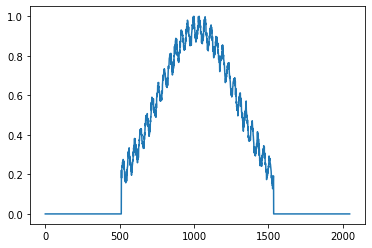

In [18]:
plt.plot(scaled_signal)

In [19]:
with open(r'scaled_signal_middel_1024-1024.txt', 'w') as f:
    f.write("\n".join(map(str, scaled_signal)))

In [71]:
# Catch-up Noise

catchup_duration = 5120 - total_signal_duration

catchup_noise = np.random.normal(min_gaussian, flanking_noise_amplitude, catchup_duration)
signal = np.concatenate((signal, catchup_noise))

scaled_signal = (signal - signal_min) / (signal_max - signal_min)

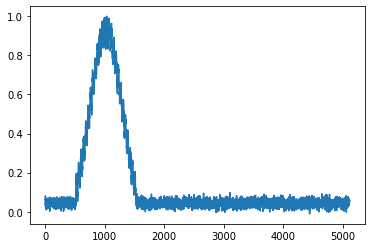

In [73]:
plt.plot(scaled_signal)

In [74]:
# scaled_signal = scaled_signal * 1e-6

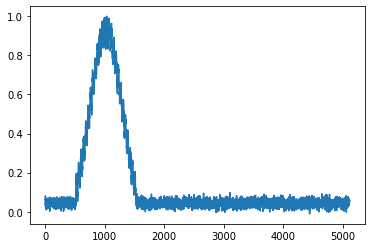

In [75]:
plt.plot(scaled_signal)

In [78]:
# Just noise signal

noise = abs(np.random.normal(min_gaussian, flanking_noise_amplitude, total_signal_duration))
scaled_noise = (noise - signal_min) / (signal_max - signal_min)
# scaled_noise = scaled_noise * 1e-6


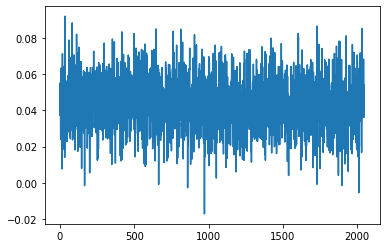

In [79]:
plt.plot(scaled_noise)

In [80]:
with open(r'scaled_noise_2048.txt', 'w') as f:
    f.write("\n".join(map(str, scaled_noise)))

In [81]:
with open(r'input_epileptic5120_1024s.txt', 'w') as f:
    f.write("\n".join(map(str, scaled_signal)))

In [40]:
# Test Import

imported_signal = np.loadtxt('input_epileptic5120_1024s.txt', delimiter="\n")

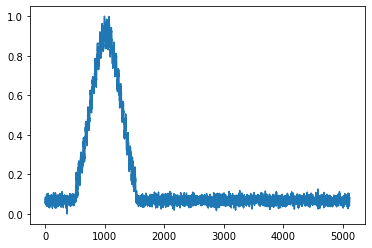

In [41]:
plt.plot(imported_signal)

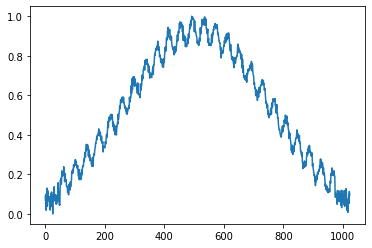

In [8]:
rounded_epileptic = np.round(imported_signal/10, 4)

with open(r'rounded_epleptic4.txt', 'w') as f:
    f.write("\n".join(map(str, rounded_epileptic)))
    
plt.plot(rounded_epileptic)

In [1]:
square_signal = np.loadtxt('neuronal_noise_2048.txt', delimiter="\n")

NameError: name 'np' is not defined

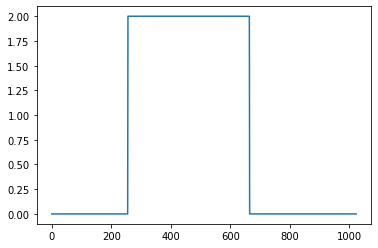

In [12]:
plt.plot(square_signal)

In [19]:
sig = []

for i in range(1024):
    if i > 30 and i < 994:
        sig.append(1.0)
    else:
        sig.append(0.0)

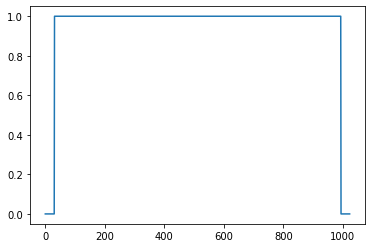

In [20]:
plt.plot(sig)

In [21]:
with open(r'longer_input.txt', 'w') as f:
    f.write("\n".join(map(str, sig)))

In [28]:
sig = []

for i in range(1024):
    if i %20 == 0:
        sig.append(1.0)
    else:
        sig.append(0.0)

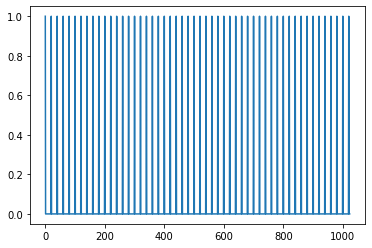

In [29]:
plt.plot(sig)

In [30]:
with open(r'spiking_input.txt', 'w') as f:
    f.write("\n".join(map(str, sig)))

In [31]:
sig = []

for i in range(1024):
    if i > 256 and i < 665:
        sig.append(1.0)
    else:
        sig.append(0.0)

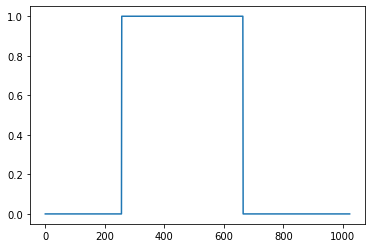

In [32]:
plt.plot(sig)

In [33]:
with open(r'replicated_square_signal.txt', 'w') as f:
    f.write("\n".join(map(str, sig)))

In [2]:
from brian2 import *

In [31]:
stimulus.__sizeof__()

32

In [32]:
inputs_nor.__sizeof__()

32

In [39]:
inputs1(0*ms)

WARNING    Group uses a dt of 100. us while TimedArray uses dt of 0.9765625 ms [brian2.input.timedarray]


36.43379732 * pamp

In [47]:
inputs_nor(1024*ms)

0. * amp

In [46]:
inputs1(1024*ms)

56.02956019 * pamp

In [48]:
stimulus(0*ms)

0.7919073979575678

In [3]:
f1 = 2.5*Hz
A0 = 0.0
A1 = 1.0
dur = 4.5*second
duty_cycle = 0.5
runtime = 1*second
record_dt = 0.9765625*ms

In [4]:
T1=int(2*int(1/f1/record_dt)*duty_cycle)
T2=int(2*int(1/f1/record_dt)*(1-duty_cycle))
in_1=array([0.]*int(runtime/record_dt))
deb=int(250*msecond/record_dt)
count=1
T=T1
#        print(deb,T,len(in_1), A0, A1)

while deb+T<=int((250*msecond+dur)/record_dt):
    if count==0:
        in_1[deb:deb+T]=A0
    else :
        in_1[deb:deb+T]=A1
    #print(in_1[deb])
    deb=deb+T
    count=(count+1)%2
    if count==0:
        T=T2
    else :
        T=T1
in_1[deb:int((250*msecond+dur)/record_dt)]=A0*int(count==0)+A1*int(count==1)

In [6]:
type(in_1)

numpy.ndarray

In [67]:
imported_signal.shape

(1024,)

In [7]:
imported_epileptic = np.loadtxt('input_epileptic.txt', delimiter="\n")

In [9]:
imported_square = np.loadtxt('square_input.txt', delimiter="\n")

In [11]:
imported_epileptic

array([ 0.0364338 ,  0.09061297,  0.09833569, ...,  0.06254933,
        0.08033036,  0.05602956])

In [12]:
imported_square

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [17]:
type(imported_square)

numpy.ndarray

In [18]:
type(imported_epileptic[0])

numpy.float64